## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categeoricla variables that are correlated, keep the one with fewer values.

In [82]:
absent['Disciplinary failure'].nunique()

2

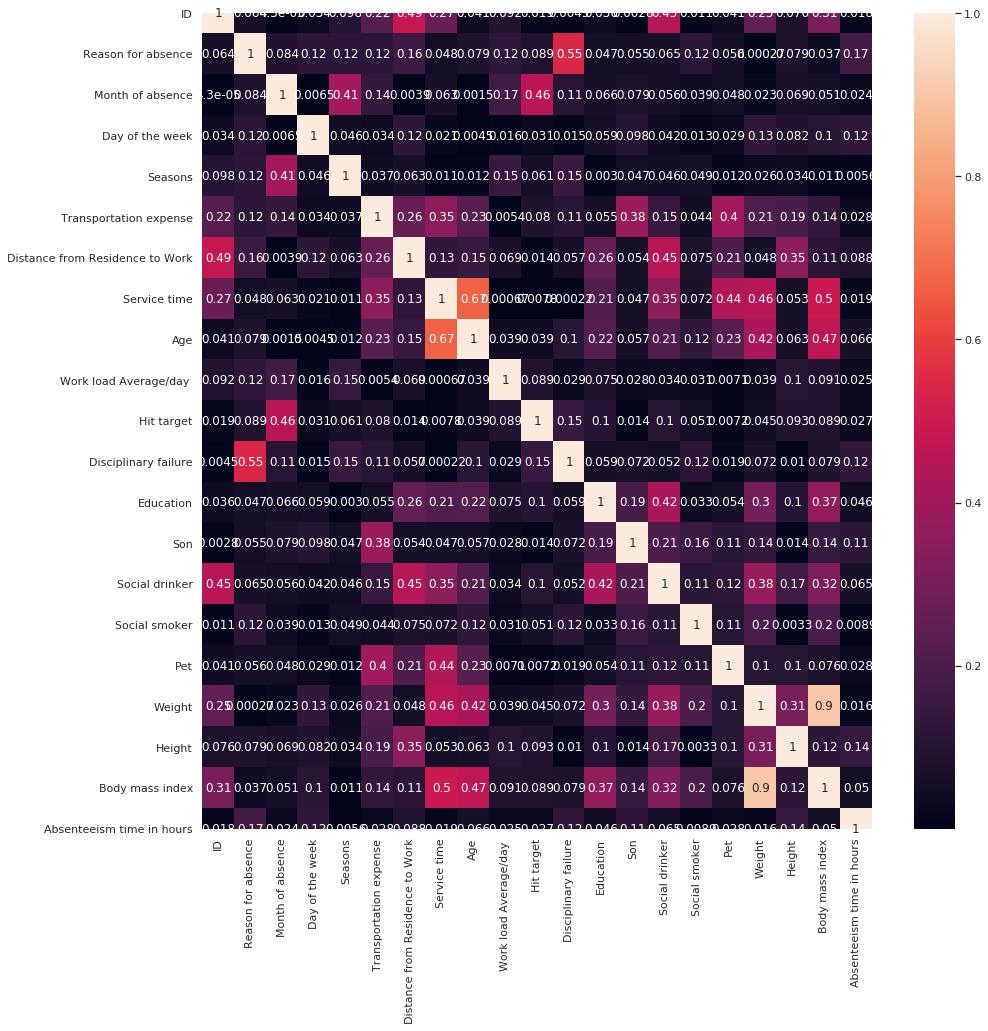

In [79]:
# answer below:
plt.figure(figsize=(15,15))


absent_new = absent.drop(['Weight','Age','Transportation expense','ID'],axis=1)

sns.heatmap(abs(absent.corr()), annot=True)

Find out which columns contain categorical variables and turn those into dummy variables.

In [0]:
# answer below:
dum_lst= ['Education','Son','Social drinker','Social smoker','Pet','Month of absence','Day of the week','Seasons','Reason for absence']

dummies= pd.get_dummies(absent_new[dum_lst].astype(str), drop_first=True)
lst_col=list(set(absent_new.columns)-set(dum_lst))

In [0]:
data = pd.concat([dummies, absent_new[lst_col]],axis=1)

In [0]:
#Split the data into train and test with test containing 20% of the data.
from sklearn.model_selection import  train_test_split
X= data.drop(['Disciplinary failure'],axis=1)
Y= data['Disciplinary failure']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [0]:
# answer below:



In [0]:
from sklearn.metrics import mean_squared_error as mse

Train a KNN regression model using k=15 and compute the MSE for the test subsample.

In [89]:
# answer below

from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=15)
results=knn.fit(X_train,y_train)


print(results.score(X_test, y_test))
print(results.score(X_train, y_train))

#T = np.arange(0, 50, 0.1)[:, np.newaxis]

predict = knn.predict(X_test)
error = y_test  - predict

0.0013300892133008002
0.18103101202507055


In [90]:
mse(y_test,predict)

0.06870870870870872

In [100]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(10, 150,2)}
grid = GridSearchCV(knn, param_grid=params,  cv=3, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=15, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
       140, 142, 144, 146, 148])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

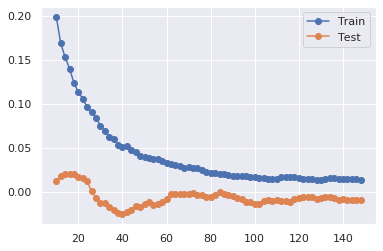

In [101]:
cv_r = pd.DataFrame(grid.cv_results_) 
import seaborn as sns
sns.set()

plt.plot(cv_r['param_n_neighbors'], cv_r['mean_train_score'], 'o-', label='Train') 
plt.plot(cv_r['param_n_neighbors'], cv_r['mean_test_score'], 'o-', label='Test') 
plt.legend() 
plt.show()